In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# LOADING AND CLEANING DATA

In [11]:
df1 = pd.read_csv('USD_EUR_data.csv',usecols=['Дата','Цена'])
df1.rename(columns={'Дата' : 'Date', 'Цена' : 'USD_EUR_Price'},inplace=True)

In [13]:
len(df1)

23

In [14]:
df2 = pd.read_csv('USD_RUB_data.csv',usecols=['Дата','Цена'])
df2.rename(columns={'Дата' : 'Date', 'Цена' : 'USD_RUB_Price'},inplace=True)

In [15]:
len(df2)

21

In [18]:
df = df1.merge(df2,left_on='Date',right_on='Date',how='inner')

In [19]:
len(df)

21

In [20]:
df.head()

,Date,USD_EUR_Price,USD_RUB_Price
0,13.03.2020,"0,9004","72,6133"
1,12.03.2020,"0,8941","74,8742"
2,11.03.2020,"0,8873","72,9375"
3,10.03.2020,"0,8865","71,3747"
4,06.03.2020,"0,8861","68,5685"


In [23]:
df['USD_EUR_Price'] = df['USD_EUR_Price'].apply(lambda x: x.replace(',','.'))
df['USD_RUB_Price'] = df['USD_RUB_Price'].apply(lambda x: x.replace(',','.'))

In [24]:
df['USD_EUR_Price'] = df['USD_EUR_Price'].astype('float')
df['USD_RUB_Price'] = df['USD_RUB_Price'].astype('float')

# BASIC STATISTICS 

In [27]:
print('Standart deviation: USD_EUR_Price : {0}, USD_RUB_Price : {1}'.format(df['USD_EUR_Price'].std(),\
                                                                            df['USD_RUB_Price'].std()))

Standart deviation: USD_EUR_Price : 0.015130840470156757, USD_RUB_Price : 3.4976321138191544


In [28]:
print('Variation : USD_EUR_Price : {0}, USD_RUB_Price : {1}'.format(df['USD_EUR_Price'].var(),\
                                                                            df['USD_RUB_Price'].var()))

Variation : USD_EUR_Price : 0.00022894233333333353, USD_RUB_Price : 12.233430403619048


In [29]:
print('Mean : USD_EUR_Price : {0}, USD_RUB_Price : {1}'.format(df['USD_EUR_Price'].mean(),\
                                                                            df['USD_RUB_Price'].mean()))

Mean : USD_EUR_Price : 0.9085333333333333, USD_RUB_Price : 66.66535238095237


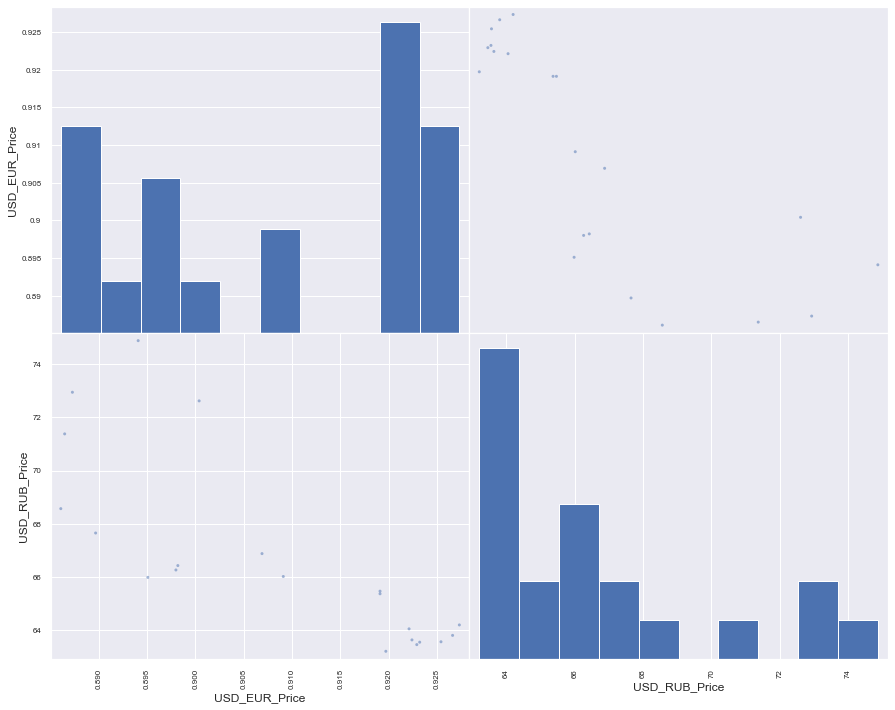

In [33]:
pd.plotting.scatter_matrix(df[['USD_EUR_Price','USD_RUB_Price']],figsize=(15,12));

In [35]:
df[['USD_EUR_Price','USD_RUB_Price']].corr()

,USD_EUR_Price,USD_RUB_Price
USD_EUR_Price,1.000000,-0.787769
USD_RUB_Price,-0.787769,1.000000


# BUILDING AND FITTING LINEAR REGRESSION

In [44]:
class LinearRegression:
    def __init__(self):
        self.a = None
        self.b = None
        self.X = None
        self.y = None

    def calculate_error(self,y_true,y_pred):
        return np.sum(np.power(y_pred-y_true,2))
    
    def calculate_determination(self,y_true,y_pred):
        mean_ytrue = np.mean(y_true)
        return self.calculate_error(y_true,y_pred)/np.sum(np.power(y_true-mean_ytrue,2))
    
    def get_train_error(self):
        y_pred = self.predict(self.X)
        return self.calculate_error(self.y,y_pred)
    
    def get_train_determination(self):
        y_pred = self.predict(self.X)
        return self.calculate_determination(self.y,y_pred)
        
    def fit(self,X,y):
        self.X = X.copy()
        self.y = y.copy()
        mean_X = np.mean(X)
        mean_y = np.mean(y)
        self.a = np.sum((X-mean_X)*(y-mean_y))/np.sum(np.power(X-mean_X,2))
        self.b = mean_y - self.a*mean_X
        return self
    
    def predict(self, X):
        return X*self.a + self.b
    

In [45]:
lr = LinearRegression()

In [63]:
X, y = df['USD_EUR_Price'].values, df['USD_RUB_Price'].values

In [64]:
lr.fit(X,y)

In [65]:
lr.get_train_determination()

0.37942045295284443

In [66]:
lr.get_train_error()

92.83227409816475

In [67]:
y_pred = lr.predict(X)

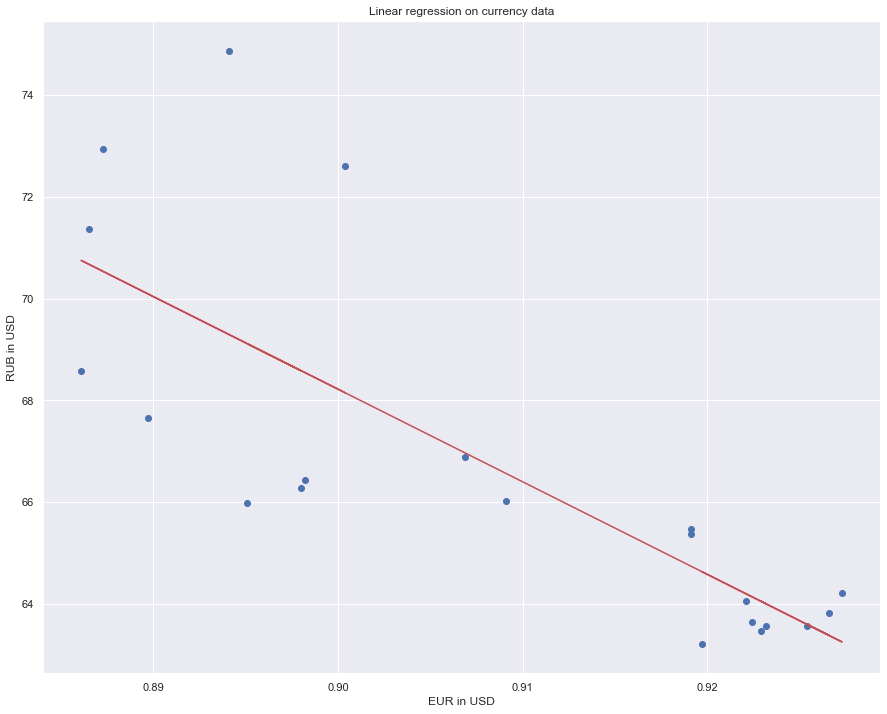

In [71]:
plt.figure(figsize=(15,12))
plt.title('Linear regression on currency data')
plt.scatter(X,y)
plt.plot(X,y_pred,'r')
plt.xlabel('EUR in USD')
plt.ylabel('RUB in USD');